In [13]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("Data.csv")
df.sample(5) # sample 5 rows

,area,bedrooms,price
5,1170,2,38
3,1521,3,75
4,1200,2,51
9,3700,5,167
14,2250,3,101


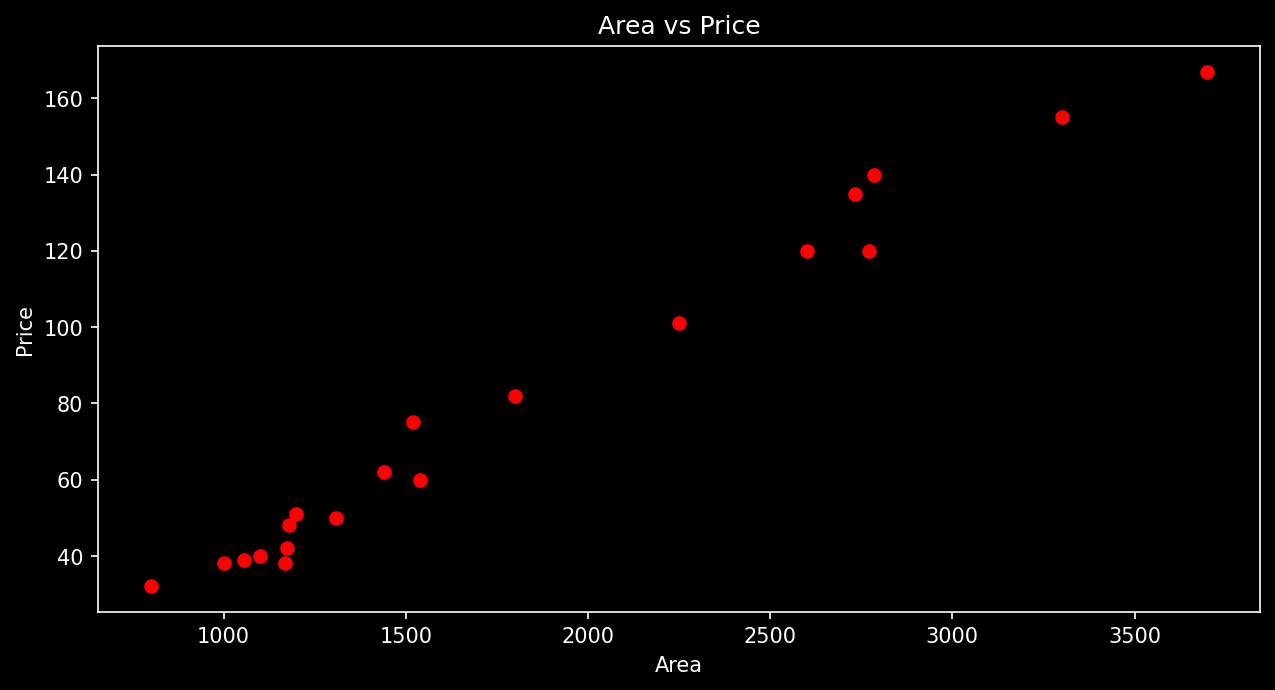

In [15]:
plt.figure(figsize=(10,5),dpi=150)
plt.style.use("dark_background")
area = df["area"]
price = df["price"]
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.scatter(area, price, c="red", marker="o")
plt.savefig("Images/area_vs_price.png", bbox_inches="tight")

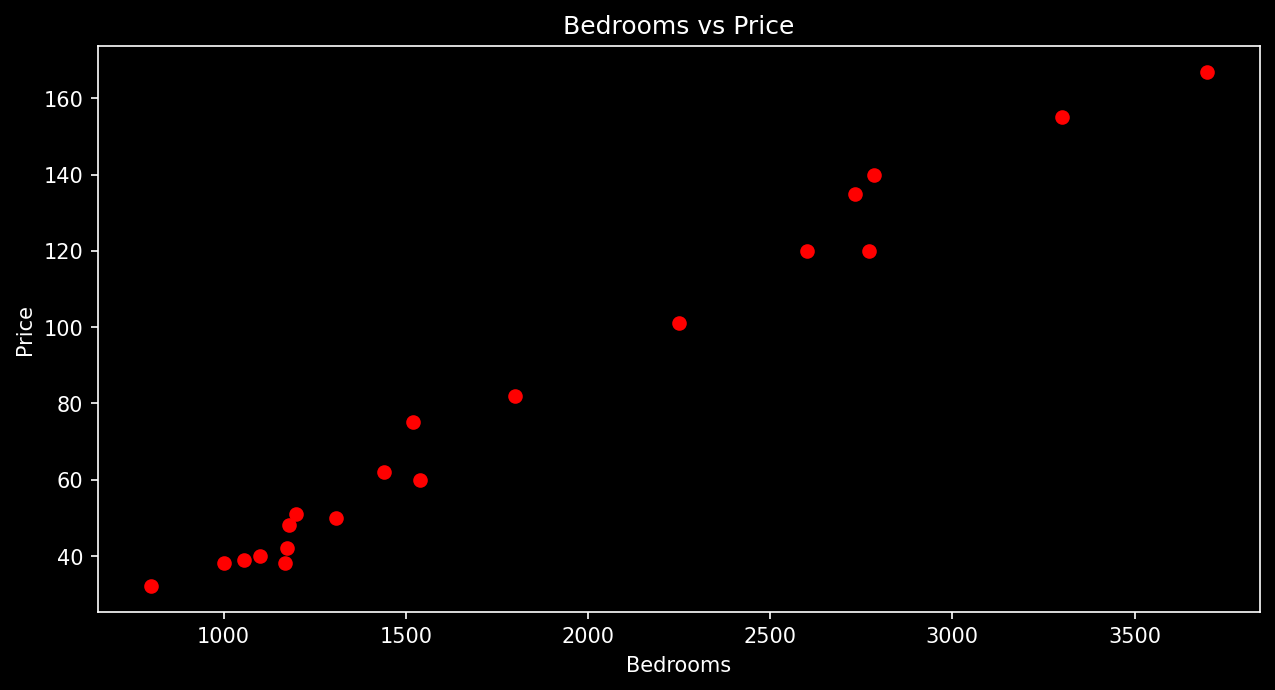

In [16]:
plt.figure(figsize=(10,5),dpi=150)
plt.style.use("dark_background")
bedrooms = df["bedrooms"]
price = df["price"]
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs Price")
plt.scatter(area, price, c="red", marker="o")
plt.savefig("Images/bedrooms_vs_price.png", bbox_inches="tight")

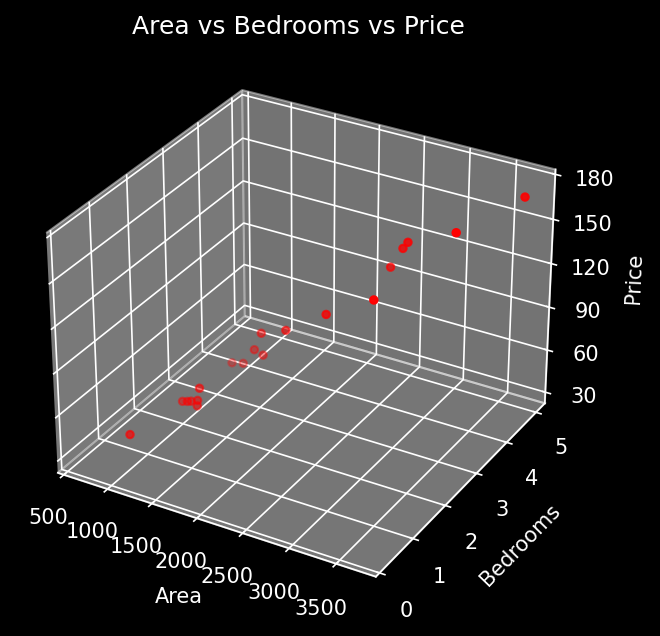

In [17]:
plt.figure(figsize=(10,5),dpi=150)
plt.style.use("dark_background")
ax = plt.axes(projection="3d")
ax.scatter3D(area, bedrooms, price, color="red", marker=".", s=50)
ax.set_xticks(np.arange(500, 4000, 500))
ax.set_yticks(np.arange(0, 6, 1))
ax.set_zticks(np.arange(30, 200, 30))
ax.set_xlabel("Area")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")
ax.set_title("Area vs Bedrooms vs Price")
plt.savefig("Images/area_vs_bedrooms_vs_price.png", bbox_inches="tight")

In [18]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [19]:
print(X.shape)
print(y.shape)

(20, 2)
(20,)


In [20]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [21]:
def batch_gradient_descent(x, y_true, epochs=500, learning_rate = 0.01):

    number_of_features = x.shape[1] # our case number_of_features = 2 (area, bedroom)    
    w = np.ones(number_of_features) # initialize weights to 1
    b = 0 # initialize bias to 0
    total_samples = x.shape[0] # number of rows in x
    
    cost_list = []
    epoch_list = []
    
    for epoch in range(epochs):        
        y_predicted = w @ x.T + b # y_predicted = wx + b
        error = y_true - y_predicted # error = y_true - y_predicted

        w_grad = -(2/total_samples)*(error @ x) # w_grad = -(2/total_samples)*(error*x)
        b_grad = -(2/total_samples)*np.sum(error) # b_grad = -(2/total_samples)*(sum(error))
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.sum(error**2)/total_samples
        
        if epoch%10==0:
            cost_list.append(cost)
            epoch_list.append(epoch)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, y)

w, b, cost

(array([34.31248402,  8.91288029]), 79.74672833718462, 39.84442929419339)

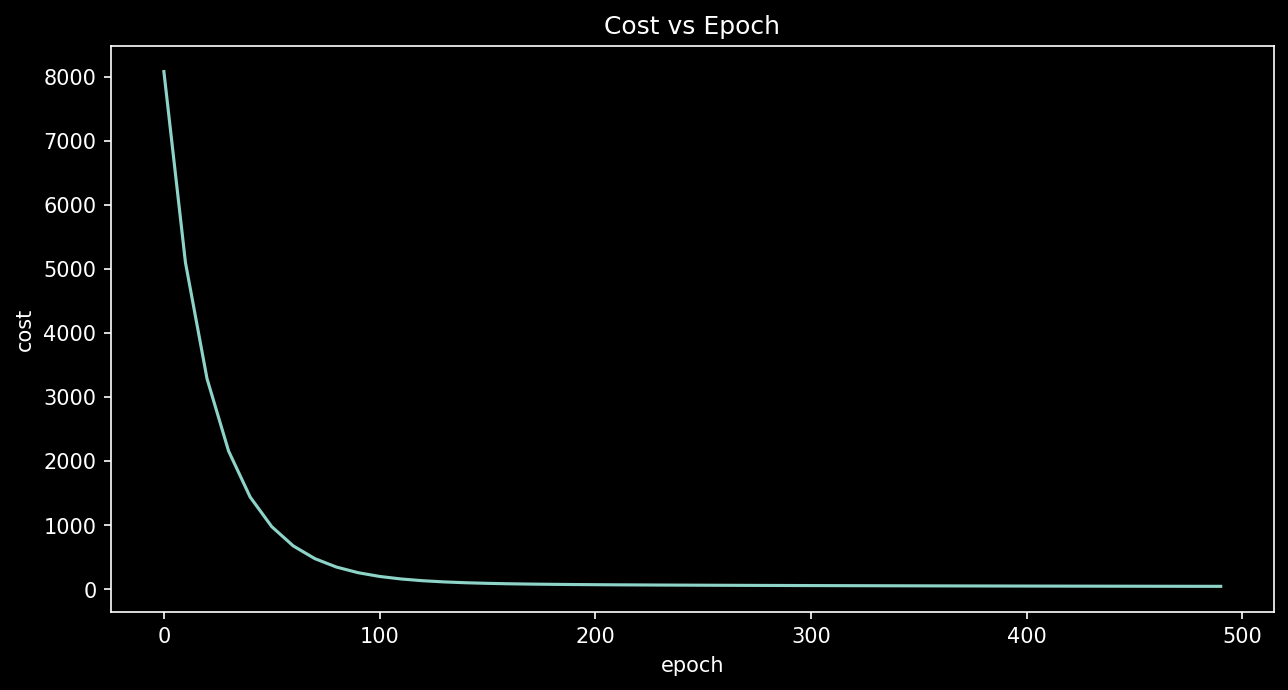

In [22]:
plt.figure(figsize=(10,5),dpi=150)
plt.style.use("dark_background")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("Cost vs Epoch")
plt.plot(epoch_list,cost_list)
plt.savefig("Images/cost_vs_epoch_BGD.png", bbox_inches="tight")

In [23]:
def predict(x):
    scaled_x = scaler.fit_transform(x)
    y_pred = w @ scaled_x.T + b
    return y_pred

In [24]:
predict(X)

array([ 40.0776456 , 121.83872008,  65.16029893,  68.45831078,
        45.94077777,  44.7192919 , 127.21325791, 150.34005703,
        59.8671935 , 176.07416949,  79.81812936, 129.37121627,
        37.79753864,  41.86915821,  98.1404174 ,  44.92287288,
        54.57408807,  69.2319185 , 119.31283913,  20.2066653 ])